# Intro Julia
* Julia 공식 튜토리얼(추천) : https://julialang.org/learning/tutorials/
* 강의
    * https://juliaacademy.com/p/intro-to-julia
    * https://www.youtube.com/playlist?list=PLhQ2JMBcfAsi_3g2AFJ6B84d8c5jw5kXp
    * https://www.youtube.com/playlist?list=PLP8iPy9hna6Qpx0MgGyElJ5qFlaIXYf1R

## Check!
- 우리의 개발 환경이 올바르게 구성되어 있는지 확인

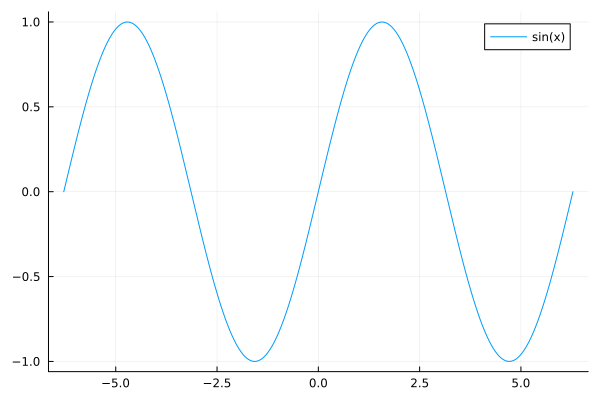

In [1]:
using Plots
plot(sin, -2π, 2π, label="sin(x)")

## Help!

In [2]:
?plot

ErrorException: syntax: invalid identifier name "?"

## LaTeX!
- `$$ \exp(i \pi) = -1 $$`와 같은 명령어가 어색하다면 https://www.overleaf.com/learn/latex/Tutorials 을 먼저 확인하세요.

**Euler found that**

$$ \exp(i \pi) = -1 $$

## @show 매크로

In [3]:
using LinearAlgebra
x = [1,2]
y = [3,4]
@show dot(x, y);
@show x⋅y;

dot(x, y) = 11
x ⋅ y = 11


In [4]:
f(x) = x + 1
[@eval(@show(f($x))) for x = 1:3];

f(1) = 2
f(2) = 3
f(3) = 4


# Tutorial 1 : Plotting a White Noise Process

In [5]:
using LinearAlgebra, Statistics, LaTeXStrings, Plots

In [6]:
randn()

0.34516214578159676

In [7]:
?randn

ErrorException: syntax: invalid identifier name "?"

In [8]:
randn(5)

5-element Vector{Float64}:
 -1.5895955556061176
  0.29929510537108367
  0.33922684734910935
  1.1138098559653504
 -1.9415638971573008

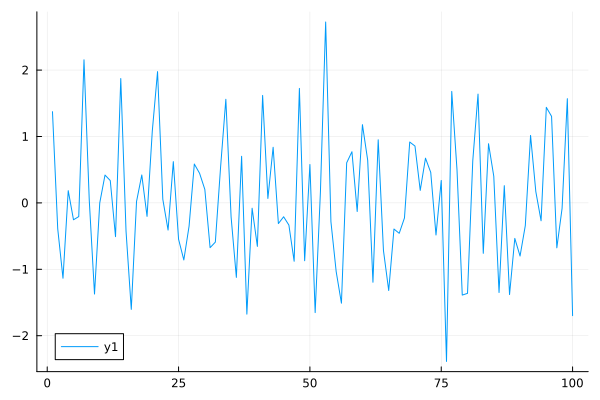

In [9]:
n = 100
ϵ = randn(n)
plot(1:n, ϵ)

## Arrays

In [10]:
ϵ[1:5]

5-element Vector{Float64}:
  1.3735228864240503
 -0.39070201761518636
 -1.1347232629838269
  0.18404466203182754
 -0.2543470022462998

In [11]:
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [12]:
?typeof

ErrorException: syntax: invalid identifier name "?"

## Loop

In [13]:
# 반복문 1; 추천하지 않음
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [14]:
# 반복문 2; 반복자 활용, 추천
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [15]:
ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

0.0037478548630398125

In [16]:
@show ϵ_mean ≈ mean(ϵ[1:m]);
@show ϵ_mean ≈ sum(ϵ[1:m]) / m;
@show ϵ_mean == mean(ϵ[1:m]);
@show ϵ_mean == sum(ϵ[1:m]) / m;

ϵ_mean ≈ mean(ϵ[1:m]) = true
ϵ_mean ≈ sum(ϵ[1:m]) / m = true
ϵ_mean == mean(ϵ[1:m]) = true
ϵ_mean == sum(ϵ[1:m]) / m = true


In [17]:
@show ℯ^(-π*im);
@show ℯ^(-π*im) == -1;
@show ℯ^(-π*im) ≈ -1;

ℯ ^ (-π * im) = -1.0 - 1.2246467991473532e-16im
ℯ ^ (-π * im) == -1 = false
ℯ ^ (-π * im) ≈ -1 = true


In [18]:
?isapprox

ErrorException: syntax: invalid identifier name "?"

## User-Def. FN

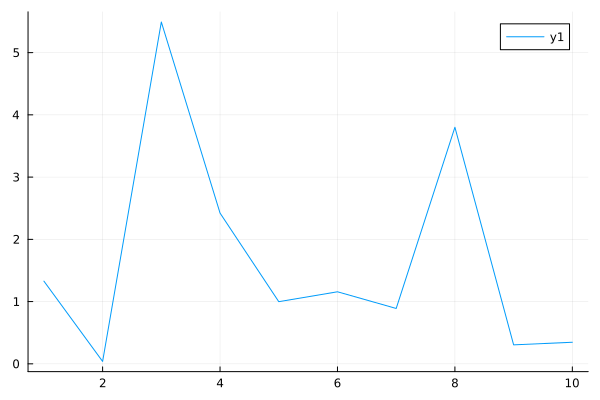

In [19]:
# 함수1
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end
data = generatedata(10)
plot(data)

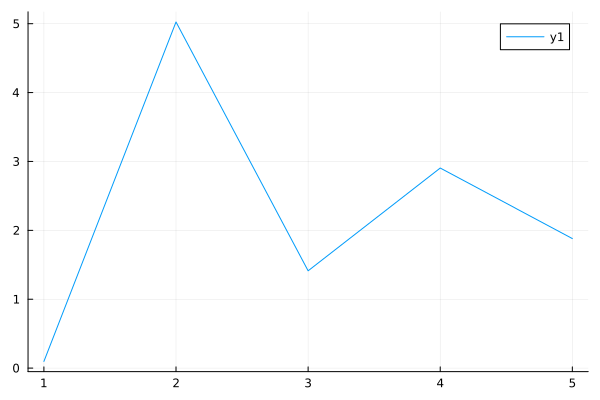

In [20]:
# 함수2
function generatedata(n)    
    ϵ = randn(n)
    return ϵ.^2
 end
data = generatedata(5)
plot(data)

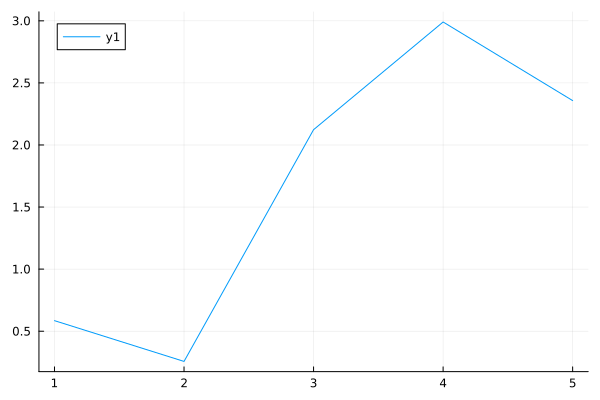

In [21]:
# 함수3
generatedata(n) = randn(n).^2
data = generatedata(5)
plot(data)

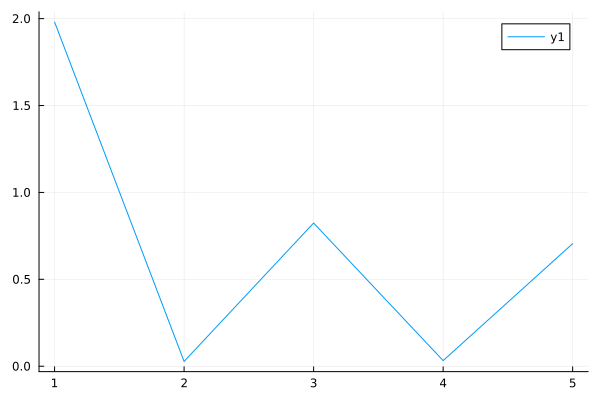

In [22]:
# 함수4
# 연구자라면 함수 합성을 활용하세요.
f(x) = x^2
generatedata(n) = f.(randn(n))
data = generatedata(5)
plot(data)

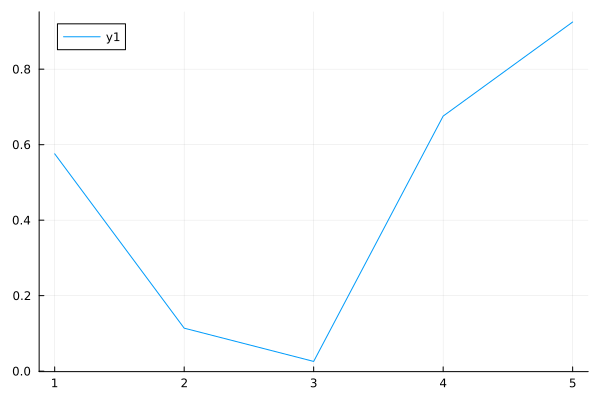

In [23]:
# 함수5
generatedata(n, gen) = gen.(randn(n))
f(x) = x^2
data = generatedata(5, f)
plot(data)

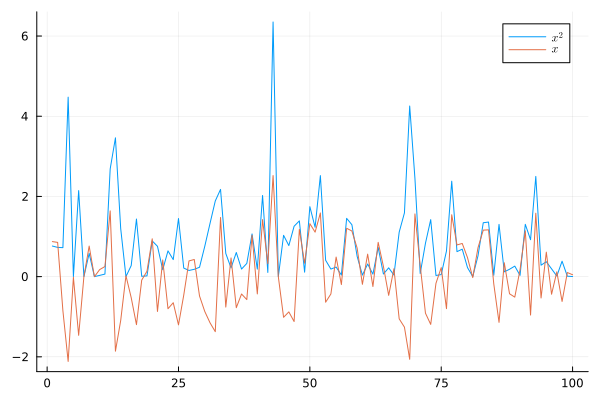

In [24]:
n = 100
f(x) = x^2
x = randn(n)

plot(f.(x), label=L"x^2")
plot!(x, label=L"x")

## 함수, 조금 더 유용하게

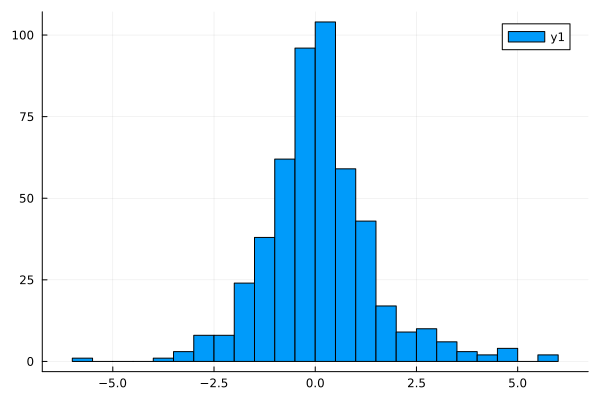

In [25]:
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n)
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp, 500)

In [26]:
?rand

ErrorException: syntax: invalid identifier name "?"

# Tutorial 2. Variations on Fixed Points

> Take a mapping $f : X \to X$ for some set $X$. If there exists an $x^* \in X$ such that $f(x^*) = x^*$, then $x^*$: is called a "fixed point" of $f$.


### Fixed Point Maps

In [27]:
# 반복문1
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8

v_old = v_iv
normdiff = Inf
iter = 1

while normdiff > tolerance && iter <= maxiter
    v_new = p + β * v_old
    normdiff = norm(v_new - v_old)    
    v_old = v_new
    iter = iter + 1
end

println("Fixed point = $v_old |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [28]:
# 반복문2
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8

v_old = v_iv
normdiff = Inf
iter = 1

for i in 1:maxiter
    v_new = p + β * v_old
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance
        iter = i
        break
    end
    v_old = v_new
end

println("Fixed point = $v_old |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231 |f(x) - x| = 9.181037796679448e-8 in 154 iterations


In [29]:
# 함수1; 반복문에 비해서 좋음
function v_fp(β, ρ, v_iv, tolerance, maxiter)
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old
        normdiff = norm(v_new - v_old)
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter)
end

p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, normdiff, iter = v_fp(β, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [30]:
# 함수2; 함수 전달을 활용
function fixedpointmap(f, iv, tolerance, maxiter)
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [31]:
# 함수3; NamedTuple을 활용
function fixedpointmap(f, iv; tolerance=1E-7, maxiter=1000)
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (;value = x_old, normdiff, iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v

sol = fixedpointmap(f, 0.8; tolerance=1.0E-8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035 |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [32]:
(;value, normdiff, iter) = fixedpointmap(f, 0.8; tolerance=1.0E-8)
println("Fixed point = $value |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999918629035 |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [33]:
# 기존 함수 활용
r = 2.0
f(x) = r * x * (1 - x)
sol = fixedpointmap(f, 0.8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968 |f(x) - x| = 3.979330237546819e-8 in 7 iterations


### 패키지 활용

In [47]:
using NLsolve #fixedpoint

p = 1.0
β = 0.9
f(v) = p .+ β * v
sol = fixedpoint(f, [0.8]; m = 0)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816] |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [48]:
# 좀 더 낭은 구조
p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v, iv)
fnorm = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $fnorm  in $(sol.iterations) iterations converged = $(sol.f_converged)")

Fixed point = [9.999999999999972] |f(x) - x| = 3.552713678800501e-15  in 3 iterations converged = true


In [37]:
eps()

2.220446049250313e-16

In [38]:
p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # higher precision

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155] |f(x) - x| = 0.0 in 3 iterations


### Multivariate Fixed Point Maps

In [39]:
p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]
f(v) = p .+ β * v

sol = fixedpointmap(f, iv; tolerance = 1.0E-8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = [9.999999961080519, 19.999999923853192] |f(x) - x| = 9.501826248250528e-9 in 184 iterations


In [40]:
using NLsolve

p = [1.0, 2.0, 0.1]
β = 0.9
iv =[0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929] |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [41]:
using NLsolve, StaticArrays

p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixmed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixmed point = [10.0, 20.000000000000004, 0.9999999999999929] |f(x) - x| = 6.661338147750939e-16 in 3 iterations


# 연습문제

### Exercise 1
Recall that $ n! $ is read as “$ n $ factorial” and defined as $ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $. In Julia you can compute this value with `factorial(n)`. Write your own version of this function, called `factorial2`, using a `for` loop.

### Exercise 2
The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents 
- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  

Using only `rand()` from the set of Julia’s built-in random number generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $.
Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $.

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo. For random number generation use only `rand()`.Your hints are as follows:
- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $.  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $.  
- For a circle, area = π * $ radius^2 $.

### Exercise 4
Write a program that prints one realization of the following random device: 
- Flip an unbiased coin 10 times.  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar.  
- If not, pay nothing.  

Once again use only `rand()` as your random number generator.

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal. Set $ n = 200 $ and $ \alpha = 0.9 $.

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $. (The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)

### Exercise 7

This exercise is more challenging. Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state).  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal.  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $.  

Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  

### Exercise 8(a)

This exercise is more challenging.

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $.

One solution method to find local roots of smooth functions is called Newton’s method.

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`.  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative.  

### Exercise 8(b)
For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation.

In [ ]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative.  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`.  

# 연습문제 정답

### Exercise 1

In [ ]:
function factorial2(n)
    k = 1
    for i in 1:n
        k *= i  # or k = k * i
    end
    return k
end

factorial2(4)

In [ ]:
factorial2(4) == factorial(4) # built-in function

### Exercise 2

In [ ]:
function binomial_rv(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count += 1 # or count = count + 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

### Exercise 3

Consider a circle with diameter 1 embedded in a unit square.

Let $ A $ be its area and let $ r = 1/2 $ be its radius.

If we know $ \pi $ then we can compute $ A $ via
$ A = \pi r^2 $.

But the point here is to compute $ \pi $, which we can do by
$ \pi = A / r^2 $.

Summary: If we can estimate the area of the unit circle, then dividing
by $ r^2 = (1/2)^2 = 1/4 $ gives an estimate of $ \pi $.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that fall into the unit circle.

In [ ]:
n = 1000000
count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # distance from middle of square
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

### Exercise 4

In [ ]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    if U < 0.5
        count += 1
    else
        count = 0
    end
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

We can simplify this somewhat using the **ternary operator**. Here are
some examples

In [ ]:
a = 1  < 2 ? "foo" : "bar"

In [ ]:
a = 1 > 2 ? "foo" : "bar"

Using this construction:

In [ ]:
payoff = 0.0
count = 0.0

print("Count = ")

for i in 1:10
    U = rand()
    count = U < 0.5 ? count + 1 : 0
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

### Exercise 5

Here’s one solution

In [ ]:
using Plots
α = 0.9
n = 200
x = zeros(n + 1)

for t in 1:n
    x[t+1] = α * x[t] + randn()
end
plot(x)

### Exercise 6

In [ ]:
αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to

for α in αs
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
    plot!(p, x, label = "alpha = $α") # add to plot p
end
p # display plot

### Exercise 7: Hint

As a hint, notice the following pattern for finding the number of draws of a uniform random number until it is below a given threshold

In [ ]:
function drawsuntilthreshold(threshold; maxdraws=100)
    for i in 1:maxdraws
        val = rand()
        if val < threshold # checks threshold
            return i # leaves function, returning draw number
        end
    end
    return Inf # if here, reached maxdraws
end

draws = drawsuntilthreshold(0.1; maxdraws=100)

Additionally, it is sometimes convenient to add to just push numbers onto an array without indexing it directly

In [ ]:
vals = zeros(0) # empty vector

for i in 1:100
    val = rand()
    if val < 0.5
        push!(vals, val)
    end
end
println("There were $(length(vals)) below 0.5")